Importing all required Libraries

In [ ]:
import tarfile
import os
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
punctuations= string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopword_list = stopwords.words("english")
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,f1_score,precision_recall_fscore_support,log_loss
from sklearn.linear_model import Lasso, SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
### Untar Files

In [ ]:
file = "http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz"

In [ ]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=5bafc620b6da1fc11894812a4112d9c2639001c184014a921fa269b9a93200d0
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
wget.download(file)
tf = tarfile.open("review_polarity.tar.gz")
tf.extractall(r"/content/C:\Users\16197\Documents\NLP week 2")

In [ ]:
neg_folder=r'/content/C:\Users\16197\Documents\NLP week 2/txt_sentoken/neg'
pos_folder=r'/content/C:\Users\16197\Documents\NLP week 2/txt_sentoken/pos'

Adding a Column named Label to the Dataframe

In [ ]:
def create_df(data_dir,string):
  labels, cleaned_documents = [], []
  for doc_name in os.listdir(data_dir):
    file_path = data_dir + '/' + doc_name 
    with open(file_path, encoding='utf8', errors='ignore') as f:
      doc = f.read()
    cleaned_documents.append(doc)
    labels.append(string)
  df = pd.DataFrame({'text': cleaned_documents,'label':labels})
  return df

In [ ]:

neg_dataframe = create_df(neg_folder,'neg')
pos_dataframe = create_df(pos_folder,'pos')
df = pd.concat([neg_dataframe,pos_dataframe],axis=0)
df

,text,label
0,"as any reasonable human being would , i must a...",neg
1,"in 1990 , the surprise success an unheralded l...",neg
2,fact that charles bronson represents one of th...,neg
3,often similar to a little boy lost in a park t...,neg
4,"everyone knows that old rule , 'never work wit...",neg
...,...,...
995,gordon fleming ( peter mullan ) is in a bind ....,pos
996,elmore leonard has quickly become one of holly...,pos
997,""" the deep end "" uses a color palette of rich...",pos
998,`we run tings . \ntings don't run we . ' \n-so...,pos


Data Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')
st = PorterStemmer()
nltk.download('punkt')
stop = stopwords.words('english')
df['Lower Case'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Tokenization'] = df['Stopwords Removal'].apply(lambda x: TextBlob(x).words)
df['After Lemmatization'] = df['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,label,Lower Case,Removal of Punctuation,Removal of Special Characters,Stopwords Removal,Tokenization,After Lemmatization
0,"as any reasonable human being would , i must a...",neg,"as any reasonable human being would , i must a...",as any reasonable human being would i must ad...,as any reasonable human being would i must ad...,reasonable human would must admit occasionally...,"[reasonable, human, would, must, admit, occasi...",reasonable human would must admit occasionally...
1,"in 1990 , the surprise success an unheralded l...",neg,"in 1990 , the surprise success an unheralded l...",in 1990 the surprise success an unheralded li...,in 1990 the surprise success an unheralded li...,1990 surprise success unheralded little movie ...,"[1990, surprise, success, unheralded, little, ...",1990 surprise success unheralded little movie ...
2,fact that charles bronson represents one of th...,neg,fact that charles bronson represents one of th...,fact that charles bronson represents one of th...,fact that charles bronson represents one of th...,fact charles bronson represents one important ...,"[fact, charles, bronson, represents, one, impo...",fact charles bronson represents one important ...
3,often similar to a little boy lost in a park t...,neg,often similar to a little boy lost in a park t...,often similar to a little boy lost in a park t...,often similar to a little boy lost in a park t...,often similar little boy lost park right ventu...,"[often, similar, little, boy, lost, park, righ...",often similar little boy lost park right ventu...
4,"everyone knows that old rule , 'never work wit...",neg,"everyone knows that old rule , 'never work wit...",everyone knows that old rule never work with ...,everyone knows that old rule never work with ...,everyone knows old rule never work children an...,"[everyone, knows, old, rule, never, work, chil...",everyone know old rule never work child animal...
...,...,...,...,...,...,...,...,...
995,gordon fleming ( peter mullan ) is in a bind ....,pos,gordon fleming ( peter mullan ) is in a bind ....,gordon fleming peter mullan is in a bind he...,gordon fleming peter mullan is in a bind he...,gordon fleming peter mullan bind new unexpecte...,"[gordon, fleming, peter, mullan, bind, new, un...",gordon fleming peter mullan bind new unexpecte...
996,elmore leonard has quickly become one of holly...,pos,elmore leonard has quickly become one of holly...,elmore leonard has quickly become one of holly...,elmore leonard has quickly become one of holly...,elmore leonard quickly become one hollywoods f...,"[elmore, leonard, quickly, become, one, hollyw...",elmore leonard quickly become one hollywood fa...
997,""" the deep end "" uses a color palette of rich...",pos,""" the deep end "" uses a color palette of rich ...",the deep end uses a color palette of rich ea...,the deep end uses a color palette of rich ea...,deep end uses color palette rich earth tones s...,"[deep, end, uses, color, palette, rich, earth,...",deep end us color palette rich earth tone surr...
998,`we run tings . \ntings don't run we . ' \n-so...,pos,`we run tings . tings don't run we . ' -sound ...,we run tings tings dont run we sound advice...,we run tings tings dont run we sound advice...,run tings tings dont run sound advice capone p...,"[run, tings, tings, dont, run, sound, advice, ...",run ting ting dont run sound advice capone pau...


How many positive and negative examples are there

In [ ]:
print(df.groupby('label').size())

label
neg    1000
pos    1000
dtype: int64


How many words are present in the dataset?

In [ ]:
word = [word for i in df['text'] for word in i.split()]
print(f'There are {len(word)} words present in the dataset')

There are 1492681 words present in the dataset


What are the 100 most frequent words in the dataset (across both classes)?

In [ ]:
from collections import Counter  
# Pass the split_it list to instance of Counter class.
Counter = Counter(word)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(100)
  
print(most_occur)

[(',', 77717), ('the', 76178), ('.', 65876), ('a', 37934), ('and', 35343), ('of', 33970), ('to', 31759), ('is', 25163), ('in', 21591), ('"', 17612), ('that', 15105), ('it', 12289), (')', 11781), ('(', 11664), ('as', 11338), ('with', 10778), ('for', 9913), ('his', 9566), ('this', 9560), ('film', 8849), ('but', 8576), ('he', 7607), ('i', 7492), ('on', 7241), ('are', 6943), ('by', 6218), ('be', 6082), ('an', 5735), ('not', 5519), ('one', 5514), ('movie', 5429), ('who', 5376), ('at', 4965), ('from', 4948), ('was', 4934), ('have', 4897), ('has', 4714), ('her', 4502), ('you', 4421), ('they', 4276), ('all', 4248), ('?', 3771), ("it's", 3696), ('so', 3578), ('like', 3543), ('about', 3518), ('out', 3436), ('more', 3341), ('when', 3250), ('which', 3155), ('their', 3115), ('or', 3096), ('up', 3096), ('what', 3070), (':', 3042), ('some', 2980), ('just', 2900), ('if', 2786), ('there', 2755), ('she', 2686), ('him', 2630), ('into', 2616), ('even', 2554), ('only', 2482), ('than', 2438), ('no', 2405), 

Printing the most common 100 words

In [ ]:
common_100=', '.join([i[0] for i in most_occur])
common_100

',, the, ., a, and, of, to, is, in, ", that, it, ), (, as, with, for, his, this, film, but, he, i, on, are, by, be, an, not, one, movie, who, at, from, was, have, has, her, you, they, all, ?, it\'s, so, like, about, out, more, when, which, their, or, up, what, :, some, just, if, there, she, him, into, even, only, than, no, we, good, most, time, its, can, will, story, been, would, much, also, other, get, character, do, them, very, ;, two, characters, first, after, see, !, because, way, well, make, any, does, really, had, too'

In [ ]:
print(f'The top 100  frequent words in the dataset including both classes are {common_100}')

The top 100  frequent words in the dataset including both classes are ,, the, ., a, and, of, to, is, in, ", that, it, ), (, as, with, for, his, this, film, but, he, i, on, are, by, be, an, not, one, movie, who, at, from, was, have, has, her, you, they, all, ?, it's, so, like, about, out, more, when, which, their, or, up, what, :, some, just, if, there, she, him, into, even, only, than, no, we, good, most, time, its, can, will, story, been, would, much, also, other, get, character, do, them, very, ;, two, characters, first, after, see, !, because, way, well, make, any, does, really, had, too


How many of them are stopwords? You can find many stopword lists online. Mention which one you are using in the report.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = [s for s in word if s in stopword_list]
print(f'Here I am using NLTK stopwords.\nThere are {len(stopwords)} stopwords in the dataset')

Here I am using NLTK stopwords.
There are 588976 stopwords in the dataset


In [ ]:
def clean_text(text,stop_words=True):
    cleaned_text = text.lower()
    cleaned_text = "".join(c for c in cleaned_text if c not in punctuations)
    words = cleaned_text.split()
    if stop_words==True:
      words = [w for w in words if w not in stopword_list]
    words = [lem.lemmatize(word, "v") for word in words]
    words = [lem.lemmatize(word, "n") for word in words]
    cleaned_text = " ".join(words)
    return cleaned_text

In [ ]:
from nltk import FreqDist
fd = FreqDist(word)
df['text'] = df['text'].apply(clean_text)
words = [word for i in df['text'] for word in i.split()]
print(len(words))
fd  = FreqDist(words)
most_occur = fd.most_common(1000)
k=', '.join([i[0] for i in most_occur])
k

710243


'film, movie, one, make, character, like, get, see, go, time, scene, even, play, good, story, take, would, much, also, come, know, give, way, seem, look, two, end, first, well, work, thing, find, say, really, year, plot, think, little, life, show, people, could, bad, never, love, man, try, performance, best, star, new, many, doesnt, become, want, actor, director, dont, watch, u, action, he, use, role, great, another, act, audience, back, something, still, world, turn, interest, there, leave, however, feel, big, day, every, begin, though, tell, set, live, better, part, cast, enough, guy, around, comedy, point, last, isnt, run, real, may, fact, actually, script, funny, name, write, woman, right, lot, almost, effect, nothing, john, although, friend, place, thats, long, since, start, moment, minute, old, young, ever, line, kill, lead, happen, screen, original, call, help, keep, without, family, problem, picture, least, bring, open, quite, sequence, girl, away, need, course, cant, lose, thr

splitting  dataset into training and testing sets. Creating a training dataset by extracting 80% of the documents in each class (positive and negative). The rest of the 20% of the documents should be in the test dataset.

In [ ]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn import svm
x=df['text']
y=df['label']
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56,test_size=0.2,stratify=y)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((1600,), (400,), (1600,), (400,))

We work with the most frequent 1,000 words in the training dataset as our vocabulary. Create a function that outputs the vocabulary list and its frequency. You can use a dictionary data structure to count the frequencies.

In [ ]:
def vocabulary_list_of_frequency(words):
  freq_words_train = [word for i in words for word in i.split()]
  print(len(freq_words_train))
  fdist = FreqDist(freq_words_train)
  most_freq_train = fdist.most_common(1000)
  return most_freq_train
most_freq_train = vocabulary_list_of_frequency(train_x)
s=', '.join([i[0] for i in most_freq_train])
most_freq_train

571320


[('film', 8962),
 ('movie', 5456),
 ('one', 4655),
 ('make', 3350),
 ('like', 3109),
 ('character', 3064),
 ('get', 2982),
 ('see', 2494),
 ('go', 2393),
 ('time', 2271),
 ('scene', 2102),
 ('even', 2079),
 ('play', 1886),
 ('story', 1841),
 ('good', 1836),
 ('take', 1747),
 ('much', 1643),
 ('would', 1625),
 ('give', 1587),
 ('also', 1578),
 ('come', 1578),
 ('know', 1520),
 ('way', 1504),
 ('two', 1490),
 ('look', 1487),
 ('end', 1482),
 ('seem', 1462),
 ('first', 1427),
 ('well', 1392),
 ('work', 1392),
 ('find', 1329),
 ('thing', 1324),
 ('say', 1287),
 ('year', 1280),
 ('really', 1266),
 ('plot', 1250),
 ('think', 1228),
 ('life', 1224),
 ('show', 1205),
 ('little', 1188),
 ('people', 1183),
 ('never', 1122),
 ('could', 1117),
 ('man', 1106),
 ('bad', 1100),
 ('love', 1096),
 ('try', 1070),
 ('performance', 1047),
 ('become', 1043),
 ('best', 1039),
 ('star', 1033),
 ('new', 1029),
 ('doesnt', 1025),
 ('want', 1023),
 ('actor', 1006),
 ('many', 1001),
 ('director', 987),
 ('watch'

 function that reads in a document and outputs the feature list. Remember that each document should have the same sized feature list.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
x=df['text']
y=df['label']
count_vect = CountVectorizer()
x = count_vect.fit_transform(x)
tfidf_transformer = TfidfTransformer()
x= tfidf_transformer.fit_transform(x)
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y=label.fit_transform(y)

train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56,test_size=0.2,stratify=y)
train_x=train_x.toarray()
test_x=test_x.toarray()
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((1600, 36907), (400, 36907), (1600,), (400,))

The next task is to implement a sigmoid function that takes a number and outputs a score between 0 and 1

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))
sigmoid(2)

0.8807970779778823

In [ ]:
from sklearn import metrics
def get_metrics(predictions, test_data_y):
  accuracy = metrics.accuracy_score(predictions, test_data_y)
  precision = metrics.precision_score(predictions, test_data_y, pos_label='positive', average='micro')
  recall = metrics.recall_score(predictions, test_data_y, pos_label='positive', average='micro')
  f1 = metrics.f1_score(predictions, test_data_y, pos_label='positive', average='micro')
  return accuracy, precision, recall, f1

In [ ]:
sgd = SGDClassifier(eta0=0.0001, alpha=0.01, loss='log',random_state=15, penalty='l2', tol=1e-3,learning_rate='constant')
sgd.fit(train_x, train_y)
Sigmoid_predictions_validation_data = sgd.predict(test_x)
accuracy, precision, recall, f1 = get_metrics(Sigmoid_predictions_validation_data, test_y)
wv=np.array([[i] for i in np.append(np.array([[i] for i in sgd.coef_[0]]),[0])])
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy is 0.77
Precision is 0.77
Recall is 0.77
F1 is 0.7699999999999999


In [ ]:

def logloss(y_true,y_pred):
  ## function to compute log loss 
  loss=0
  for i in range(len(y_true)):
    loss+=((y_true[i]*math.log10(y_pred[i]))+((1-y_true[i])*math.log10(1-y_pred[i])))
  loss=-1*(1/len(y_true))*loss
  return loss
import math
def gradient(x, y, W):
  y = y.reshape(-1, 1)
  return ( x * (y - sigmoid(x @ W)) ).T
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5:
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

In [ ]:
def train(train_x,train_y,test_x,test_y,epochs,alpha,eta0,batch_size=1):
  loss_of_train, loss_of_test = [], []
  train_x = np.c_[np.ones(train_x.shape[0]), train_x]
  test_x = np.c_[np.ones(test_x.shape[0]), test_x]
  weights = np.zeros((train_x.shape[1], 1))
  loss_of_train.append(logloss(train_y, sigmoid(train_x @ weights)))
  for _ in tqdm(range(epochs)):
    r = np.random.randint(0,len(train_x),batch_size)
    random_x, random_y = train_x[r], train_y[r]
    weights += eta0 * ( random_x * (random_y.reshape(-1, 1) - sigmoid(random_x @ weights)) ).T
    weights[1:] -= eta0 * alpha * np.sqrt(weights[1:] ** 2) / train_x.shape[0]
    loss_of_train.append(logloss(train_y, sigmoid(train_x @ weights)))
    loss_of_test.append(logloss(test_y, sigmoid(test_x @ weights)))
  return weights,weights[1:] ,loss_of_train, loss_of_test
from tqdm import tqdm
alpha=0.01
eta0=0.0001
N=len(train_x)
epochs=400
w,b,loss_of_train, loss_of_test=train(train_x,train_y,test_x,test_y,epochs,alpha,eta0,batch_size=1)
print(b)
print(w)

100%|██████████| 400/400 [00:33<00:00, 12.00it/s]

[[-6.72819978e-06]
 [-1.82028108e-05]
 [ 0.00000000e+00]
 ...
 [-4.55033832e-06]
 [-3.42294857e-06]
 [ 0.00000000e+00]]
[[-2.99718879e-04]
 [-6.72819978e-06]
 [-1.82028108e-05]
 ...
 [-4.55033832e-06]
 [-3.42294857e-06]
 [ 0.00000000e+00]]


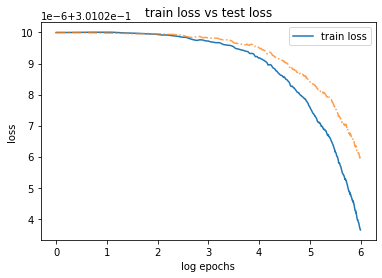

In [ ]:
plt.plot(np.log(range(1, epochs + 2)), loss_of_train)
plt.plot(np.log(range(1, epochs+1)), loss_of_test, '-.', alpha=0.75)
plt.title('train loss vs test loss')
plt.xlabel('log epochs')
plt.ylabel('loss')
plt.legend(['train loss'], loc='upper right')
plt.show()

mini-batch With batch size 32

In [ ]:
p = sigmoid(test_x @ w[:-1])
print(f'train accuracy: {accuracy_score(test_y, p >= 0.5)}')
print(f'train log loss: {log_loss(test_y, p)}')
print(accuracy_score(test_y, p >= 0.5))
print(classification_report(test_y, p >= 0.5))
print(confusion_matrix(test_y, p >= 0.5))
precision, recall, fscore, support = precision_recall_fscore_support(test_y, p >= 0.5, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

print(1-np.sum(train_y - pred(c,b,train_x))/len(train_x))
print(1-np.sum(test_y - pred(c,b,test_x))/len(test_x))

NameError: ignored

In [ ]:
def logloss1(y_true, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -(np.dot(y_true , np.log(y_pred))).sum(axis=1).mean()
def train(train_x,train_y,test_x,y_test,epochs,alpha,eta0,batch_size=1):
  loss_of_train, loss_of_test = [], []
  train_x = np.c_[np.ones(train_x.shape[0]), train_x]
  test_x = np.c_[np.ones(test_x.shape[0]), train_x]
  weights = np.zeros((train_x.shape[1], batch_size))
  for _ in tqdm(range(epochs)):
    r = np.random.randint(0,len(train_x),batch_size)
    r1 = np.random.randint(0,len(test_x),batch_size)
    random_x, random_y = train_x[r], train_y[r]
    random_x1, random_y1 = test_x[r1], y_test[r1]
    weights += eta0 * np.dot(random_x.T,random_y - sigmoid(random_x @ weights))
    weights[1:] -= eta0 * alpha * np.sqrt(weights[1:] ** 2) / train_x.shape[0]
    loss_of_train.append(logloss1(random_x.T, sigmoid(random_x @ weights)))
    loss_of_test.append(logloss1(random_x1.T, sigmoid(random_x1 @ weights)))
  return weights,weights[1:] ,loss_of_train, loss_of_test
from tqdm import tqdm
alpha=0.01
eta0=0.0001
N=len(train_x)
epochs=400
w,b,loss_of_train, loss_of_test=train(train_x,train_y,test_x,test_y,epochs,alpha,eta0,batch_size=32)
print(b)
print(w)

In [ ]:
p = sigmoid(test_x @ w[:-1])
print(f'train accuracy: {accuracy_score(test_y, p >= 0.5)}')
print(f'train log loss: {log_loss(test_y, p)}')
print(accuracy_score(test_y, p >= 0.5))
print(classification_report(test_y, p >= 0.5))
print(confusion_matrix(test_y, p >= 0.5))
precision, recall, fscore, support = precision_recall_fscore_support(test_y, p >= 0.5, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))
print(1-np.sum(train_y - pred(w,b,train_x))/len(train_x))
print(1-np.sum(test_y - pred(w,b,test_x))/len(test_x))

In [ ]:
vector_W = [np.mean(i) for i in wv[::-1]]
vector_f=[i for i in fdist.keys()][:36861]
fw={}
for i,j in zip(vector_W,vector_f):
  fw[j]=i
fw